In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def csv_to_pandas(file_path):
    df = pd.read_csv(file_path)
    return df

def generate_zooms_plot(df, dataset):
    zooms = [int(path.split('/')[2]) for path in df['Name'][:-1]]
    # Create a new figure
    plt.figure()

    # Create a scatter plot
    plt.scatter(zooms, df['Median Response Time'][:-1])

    # Add title and labels
    plt.title(dataset)
    plt.xlabel('Zoom')
    plt.ylabel('Time (ms)')

    # Display the plot
    plt.show()    

# The Datasets

In [14]:
dataset_specs = csv_to_pandas('zarr_info.csv')
dataset_specs.index = dataset_specs['collection_name']
dataset_specs_abbreviated = dataset_specs[['shape', 'chunks', 'lat_resolution', 'lon_resolution', 'chunk_size_mb', 'number_coord_chunks']]
def add_to_specs(collection_name: str, df: pd.DataFrame):
    dataset_specs_abbreviated.loc[collection_name, 'mean median response time'] = np.mean(df['Median Response Time'])
    dataset_specs_abbreviated.loc[collection_name, 'median median response time'] = np.median(df['Median Response Time'])
    dataset_specs_abbreviated    
dataset_specs_abbreviated

,shape,chunks,lat_resolution,lon_resolution,chunk_size_mb,number_coord_chunks
collection_name,,,,,,
FWI-GEOS-5-Hourly,"{'time': 26880, 'lat': 533, 'lon': 1152}","{'time': 120, 'lat': 100, 'lon': 100}",0.25,0.3125,4.577637,3
power_901_monthly_meteorology_utc,"{'time': 492, 'lat': 361, 'lon': 576}","{'time': 492, 'lat': 25, 'lon': 25}",0.50,0.6250,2.346039,43
CMIP6_GISS-E2-1-G_historical,"{'time': 1980, 'lat': 90, 'lon': 144}","{'time': 600, 'lat': 90, 'lon': 144}",2.00,2.5000,29.663086,3
aws-noaa-oisst-avhrr-only,"{'time': 15044, 'zlev': 1, 'lat': 720, 'lon': ...","{'time': 1, 'zlev': 1, 'lat': 720, 'lon': 1440}",0.25,0.2500,1.977539,4
gpm3imergdl,"{'time': 8149, 'lon': 3600, 'lat': 1800}","{'time': 10, 'lon': 3600, 'lat': 1800}",0.10,0.1000,247.192383,3


# GPM IMERG `preciptationCal` (0.1°x0.1°)

In [16]:
file_path = 'results/gpm3imergdl_urls_stats.csv'
gpmimerg_df = csv_to_pandas(file_path)
add_to_specs('gpm3imergdl', gpmimerg_df)
gpmimerg_df.head()

,shape,chunks,lat_resolution,lon_resolution,chunk_size_mb,number_coord_chunks,mean median response time,median median response time
collection_name,,,,,,,,
FWI-GEOS-5-Hourly,"{'time': 26880, 'lat': 533, 'lon': 1152}","{'time': 120, 'lat': 100, 'lon': 100}",0.25,0.3125,4.577637,3,NaN,NaN
power_901_monthly_meteorology_utc,"{'time': 492, 'lat': 361, 'lon': 576}","{'time': 492, 'lat': 25, 'lon': 25}",0.50,0.6250,2.346039,43,NaN,NaN
CMIP6_GISS-E2-1-G_historical,"{'time': 1980, 'lat': 90, 'lon': 144}","{'time': 600, 'lat': 90, 'lon': 144}",2.00,2.5000,29.663086,3,NaN,NaN
aws-noaa-oisst-avhrr-only,"{'time': 15044, 'zlev': 1, 'lat': 720, 'lon': ...","{'time': 1, 'zlev': 1, 'lat': 720, 'lon': 1440}",0.25,0.2500,1.977539,4,NaN,NaN
gpm3imergdl,"{'time': 8149, 'lon': 3600, 'lat': 1800}","{'time': 10, 'lon': 3600, 'lat': 1800}",0.10,0.1000,247.192383,3,323.645486,307.014368


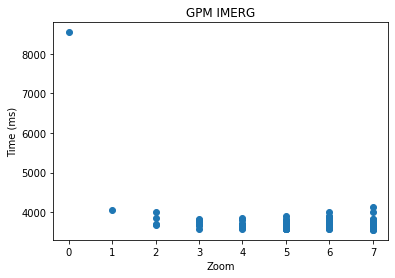

In [5]:
generate_zooms_plot(gpmimerg_df, 'GPM IMERG')

# GOES FWI (0.25°x0.3125°) results

In [6]:
file_path = 'results/FWI-GEOS-5-Hourly_urls_stats.csv'
goes_df = csv_to_pandas(file_path)
goes_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/0/0/0.png?reference=False&variable=GEOS...,1,0,9819.086506,9819.086506,9819.086506,9819.086506,6287.0,0.001157,...,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
1,GET,/tiles/1/0/1.png?reference=False&variable=GEOS...,1,0,9315.740364,9315.740364,9315.740364,9315.740364,4532.0,0.001157,...,9300,9300,9300,9300,9300,9300,9300,9300,9300,9300
2,GET,/tiles/2/1/0.png?reference=False&variable=GEOS...,1,0,8905.418938,8905.418938,8905.418938,8905.418938,693.0,0.001157,...,8900,8900,8900,8900,8900,8900,8900,8900,8900,8900
3,GET,/tiles/2/2/1.png?reference=False&variable=GEOS...,2,0,8823.780084,8954.162170,8823.780084,9084.544257,14358.0,0.002313,...,9100,9100,9100,9100,9100,9100,9100,9100,9100,9100
4,GET,/tiles/2/2/2.png?reference=False&variable=GEOS...,1,0,8925.330618,8925.330618,8925.330618,8925.330618,8664.0,0.001157,...,8900,8900,8900,8900,8900,8900,8900,8900,8900,8900


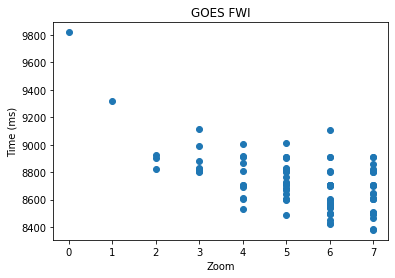

In [7]:
generate_zooms_plot(goes_df, 'GOES FWI')

# NOAA OISST Reference (0.25° x 0.25°) Results

In [8]:
file_path = 'results/aws-noaa-oisst-avhrr-only_urls_stats.csv'
noaa_oisst_df = csv_to_pandas(file_path)
noaa_oisst_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/0/0/0.png?reference=True&variable=sst&r...,1,0,7893.280348,7893.280348,7893.280348,7893.280348,21983.0,0.001938,...,7900,7900,7900,7900,7900,7900,7900,7900,7900,7900
1,GET,/tiles/1/0/1.png?reference=True&variable=sst&r...,1,0,5221.891498,5221.891498,5221.891498,5221.891498,14524.0,0.001938,...,5200,5200,5200,5200,5200,5200,5200,5200,5200,5200
2,GET,/tiles/2/1/0.png?reference=True&variable=sst&r...,1,0,5338.015035,5338.015035,5338.015035,5338.015035,4601.0,0.001938,...,5300,5300,5300,5300,5300,5300,5300,5300,5300,5300
3,GET,/tiles/2/1/1.png?reference=True&variable=sst&r...,1,0,5191.442239,5191.442239,5191.442239,5191.442239,22783.0,0.001938,...,5200,5200,5200,5200,5200,5200,5200,5200,5200,5200
4,GET,/tiles/2/1/3.png?reference=True&variable=sst&r...,1,0,5137.042846,5137.042846,5137.042846,5137.042846,693.0,0.001938,...,5100,5100,5100,5100,5100,5100,5100,5100,5100,5100


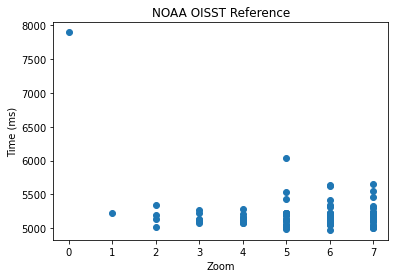

In [9]:
generate_zooms_plot(noaa_oisst_df, 'NOAA OISST Reference')

# POWER Results (0.5° x 0.625°)

In [10]:
file_path = 'results/power_901_monthly_meteorology_utc_urls_stats.csv'
power_df = csv_to_pandas(file_path)
power_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/0/0/0.png?reference=False&variable=TS&r...,1,0,4612.616061,4612.616061,4612.616061,4612.616061,24484.0,0.013308,...,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600
1,GET,/tiles/1/1/0.png?reference=False&variable=TS&r...,1,0,1410.521607,1410.521607,1410.521607,1410.521607,18685.0,0.013308,...,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400
2,GET,/tiles/2/0/2.png?reference=False&variable=TS&r...,1,0,919.315911,919.315911,919.315911,919.315911,4576.0,0.013308,...,920,920,920,920,920,920,920,920,920,920
3,GET,/tiles/2/1/1.png?reference=False&variable=TS&r...,1,0,922.527990,922.527990,922.527990,922.527990,10811.0,0.013308,...,920,920,920,920,920,920,920,920,920,920
4,GET,/tiles/2/2/0.png?reference=False&variable=TS&r...,1,0,822.702585,822.702585,822.702585,822.702585,3792.0,0.013308,...,820,820,820,820,820,820,820,820,820,820


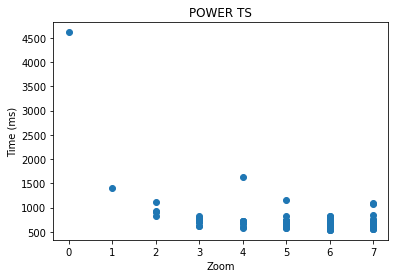

In [11]:
generate_zooms_plot(power_df, 'POWER TS')

# CMIP6 Historical Results (2° x 2.5°)

In [12]:
file_path = 'results/CMIP6_GISS-E2-1-G_historical_urls_stats.csv'
cmip6_df = csv_to_pandas(file_path)
cmip6_df.head()

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/0/0/0.png?reference=False&variable=tas&...,1,0,1523.285295,1523.285295,1523.285295,1523.285295,9409.0,0.009873,...,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
1,GET,/tiles/1/1/0.png?reference=False&variable=tas&...,1,0,1140.745859,1140.745859,1140.745859,1140.745859,4193.0,0.009873,...,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
2,GET,/tiles/2/0/0.png?reference=False&variable=tas&...,1,0,985.413857,985.413857,985.413857,985.413857,1156.0,0.009873,...,990,990,990,990,990,990,990,990,990,990
3,GET,/tiles/2/2/0.png?reference=False&variable=tas&...,1,0,1018.518888,1018.518888,1018.518888,1018.518888,1229.0,0.009873,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
4,GET,/tiles/2/2/3.png?reference=False&variable=tas&...,1,0,1034.657450,1034.657450,1034.657450,1034.657450,1243.0,0.009873,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


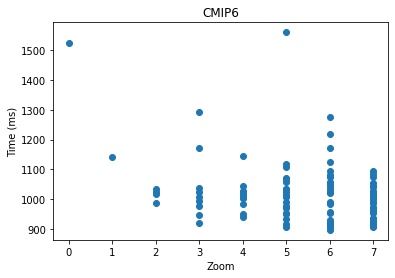

In [13]:
generate_zooms_plot(cmip6_df, 'CMIP6')

In [14]:
print(gpmimerg_df[-1:]['Median Response Time'])
print(goes_df[-1:]['Median Response Time'])
print(noaa_oisst_df[-1:]['Median Response Time'])
print(power_df[-1:]['Median Response Time'])
print(cmip6_df[-1:]['Median Response Time'])

98    3700.0
Name: Median Response Time, dtype: float64
97    8700.0
Name: Median Response Time, dtype: float64
97    5100.0
Name: Median Response Time, dtype: float64
96    720.0
Name: Median Response Time, dtype: float64
99    1000.0
Name: Median Response Time, dtype: float64
